## Project -  Data Science Process Lifecycle on Red Wine Quality Dataset

<img src="wine.gif">

### Business Understanding

The red wine industry shows a recent exponential growth as social drinking is on the rise. Nowadays, industry players are using product quality certifications to promote their products. This is a time-consuming process and requires the assessment given by human experts, which makes this process very expensive. Also, the price of red wine depends on a rather abstract concept of wine appreciation by wine tasters, opinion among whom may have a high degree of variability. Another vital factor in red wine certification and quality assessment is physicochemical tests, which are laboratory-based and consider factors like acidity, pH level, sugar, and other chemical properties. The red wine market would be of interest if the human quality of tasting can be related to wine’s chemical properties so that certification and quality assessment and assurance processes are more controlled. This project aims to determine which features are the best quality red wine indicators and generate insights into each of these factors to our model’s red wine quality.

### Data Collection

**From where do we get our data?**

The dataset(Red Wine Quality Data Set) is downloaded from the **website** of UCI Machine Learning Repository. This dataset is hosted and provided free of charge by the UCI Machine Learning Repository. 
The dataset is related to red variant of the Portuguese "Vinho Verde" wine.

### Data Understanding

Link for the dataset https://archive.ics.uci.edu/ml/datasets/wine+quality for context

**From where are red wine samples obtained?**

The red wine samples are obtained from the north of Portugal to model red wine quality based on laboratory-based physicochemical tests.




In [1]:
#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading the dataset
wine = pd.read_csv('winequality-red.csv')

In [3]:
wine.shape #get the dimensions of the dataset

(1599, 12)

Observation:   
- the dataset has got 1599 observations and 12 columns
# 

In [4]:
wine.head(10) #display first 10 rows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [5]:
wine.info()  # checking the distribution of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Observations:
- There are 12 columns in the dataset >> 11 feature columns('fixed acidity' to 'alcohol') and 1 target column('quality').

- Both feature columns and target column are numeric >>  datatype of feature columns : float64  || datatype of target column : int64

- There are no null values in any columns
# 

In [6]:
wine.quality.value_counts() # Looking at the distribution of target column

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Observation:
- there are six unique values : 3, 4, 5, 6, 7, and 8 in the target column

# 

### Data Preparation

#### Explore the dataset further


<li>Check for missing values and handle if any</li>
<li>Check for outliers if any and handle them</li>
<li>Implement Correlation heatmap</li>
<li>Check the distribution of data using histograms</li>
<li>Prepare the data for modeling by carrying out necessary steps</li>

# 

In [7]:
wine.isnull().sum() #checking for missing values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Observation: There are no missing values in the dataset
# 

#### Removing Outliers

In [8]:
wine.describe() #Looking at general statistical ditribution of numeric columns

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Observations:
- 'fixed acidity', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', and 'alcohol' have high standard deviation 
- There is a large difference between the 75th% and max values of 'residual sugar', 'free sulfur dioxide' & 'total sulfur dioxide'.
# 
Both observations indicates that there are outliers in the data set

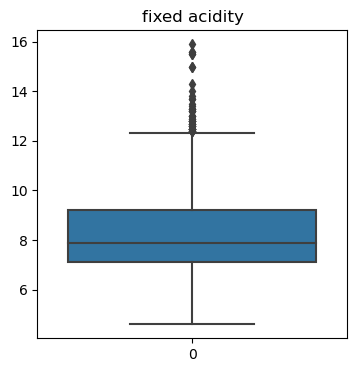

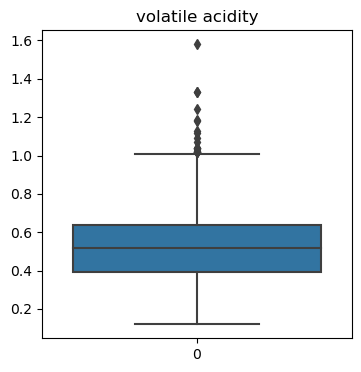

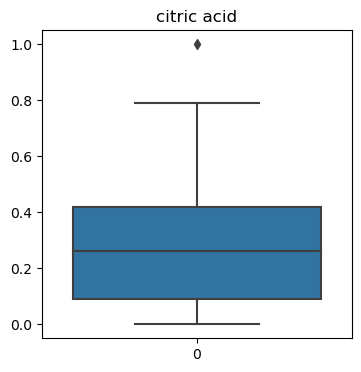

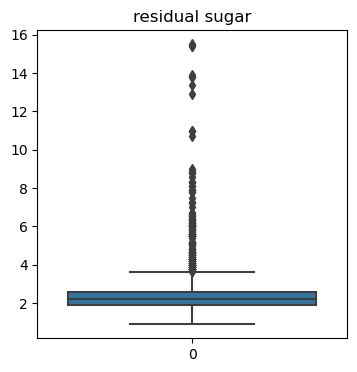

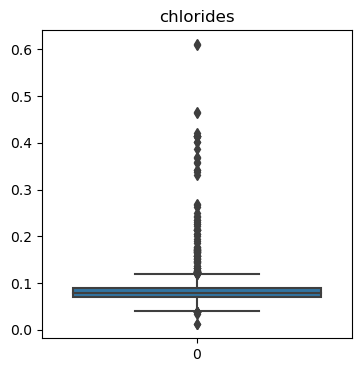

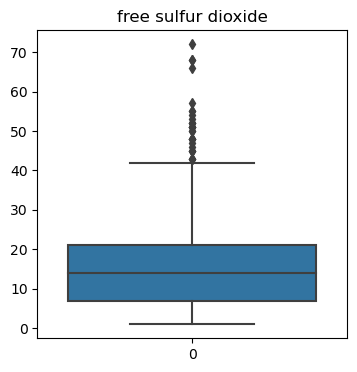

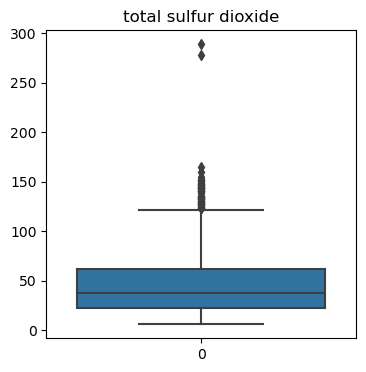

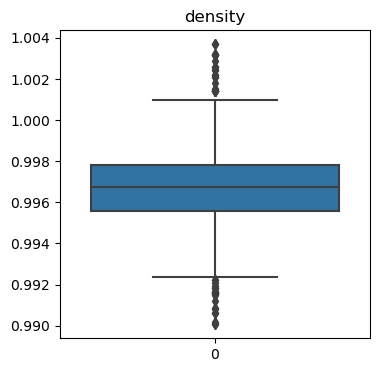

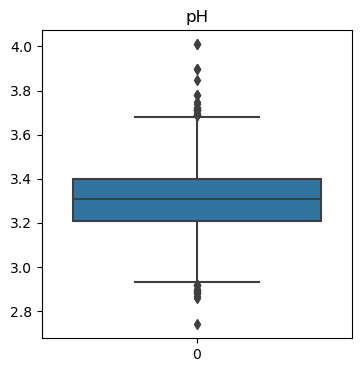

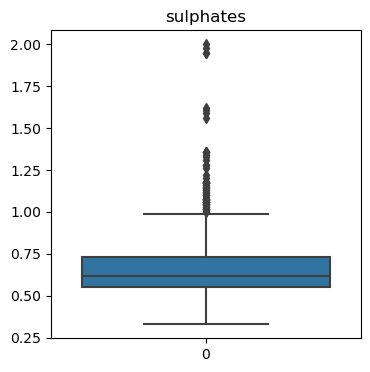

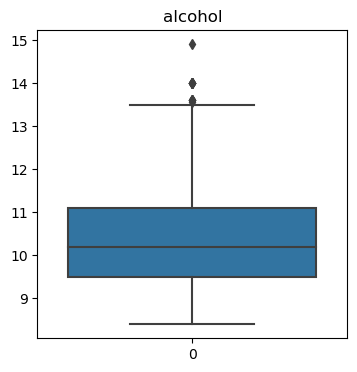

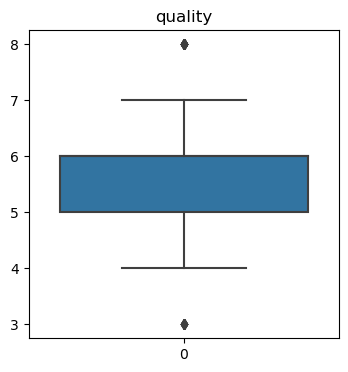

In [9]:
# Boxplot to view outliers

for f in wine.columns:
    plt.figure(figsize=(4,4))
    plt.title(f)
    sns.boxplot(data= wine[f])
    plt.show()
   
    

Observation :
- All the columns have outliers, mainly in maximum.

In [10]:
# To identify outliers, the thresholds set will be at 95th percentile, 99.5th percentile,and 3 standard deviations above the mean.

In [11]:
# function to detect outlier
def detect_outlier(feature):
    outliers = []
    data = wine[feature]
    mean = np.mean(data)
    std =np.std(data)
    
    
    for y in data:
        z_score= (y - mean)/std 
        if np.abs(z_score) > 3:
            outliers.append(y)
    print('\nOutlier caps for {}:'.format(feature))
    print('  --95p: {:.1f} / {} values exceed that'.format(data.quantile(.95),
                                                             len([i for i in data
                                                                  if i > data.quantile(.95)])))
    print('  --3sd: {:.1f} / {} values exceed that'.format(mean + 3*(std), len(outliers)))
    print('  --99.5p: {:.1f} / {} values exceed that'.format(data.quantile(.995),
                                                           len([i for i in data
                                                                if i > data.quantile(.995)])))

In [12]:
# Finding the upperbound for columns with high standard deviation
for feat in ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']:
    detect_outlier(feat)


Outlier caps for fixed acidity:
  --95p: 11.8 / 78 values exceed that
  --3sd: 13.5 / 12 values exceed that
  --99.5p: 14.0 / 8 values exceed that

Outlier caps for volatile acidity:
  --95p: 0.8 / 76 values exceed that
  --3sd: 1.1 / 10 values exceed that
  --99.5p: 1.1 / 8 values exceed that

Outlier caps for citric acid:
  --95p: 0.6 / 78 values exceed that
  --3sd: 0.9 / 1 values exceed that
  --99.5p: 0.7 / 7 values exceed that

Outlier caps for residual sugar:
  --95p: 5.1 / 79 values exceed that
  --3sd: 6.8 / 30 values exceed that
  --99.5p: 11.0 / 8 values exceed that

Outlier caps for chlorides:
  --95p: 0.1 / 80 values exceed that
  --3sd: 0.2 / 31 values exceed that
  --99.5p: 0.4 / 8 values exceed that

Outlier caps for free sulfur dioxide:
  --95p: 35.0 / 77 values exceed that
  --3sd: 47.2 / 22 values exceed that
  --99.5p: 53.0 / 8 values exceed that

Outlier caps for total sulfur dioxide:
  --95p: 112.1 / 80 values exceed that
  --3sd: 145.1 / 15 values exceed that
  

Observations:  Since there is not too many extreme outliers, 99.5th percentile threshold can be used to just cap the top extreme values.

In [13]:
# Cap features at 99.5 percentile

wine['fixed acidity'] = wine['fixed acidity'].clip(upper=wine['fixed acidity'].quantile(.995))
wine['volatile acidity'] = wine['volatile acidity'].clip(upper=wine['volatile acidity'].quantile(.995))
wine['citric acid'] = wine['citric acid'].clip(upper=wine['citric acid'].quantile(.995))
wine['residual sugar'] = wine['residual sugar'].clip(upper=wine['residual sugar'].quantile(.995))
wine['chlorides'] = wine['chlorides'].clip(upper=wine['chlorides'].quantile(.995))
wine['total sulfur dioxide'] = wine['total sulfur dioxide'].clip(upper=wine['total sulfur dioxide'].quantile(.995))
wine['free sulfur dioxide'] = wine['free sulfur dioxide'].clip(upper=wine['free sulfur dioxide'].quantile(.995))
wine['density'] = wine['density'].clip(upper=wine['density'].quantile(.995))
wine['pH'] = wine['pH'].clip(upper=wine['pH'].quantile(.995))
wine['sulphates'] = wine['sulphates'].clip(upper=wine['sulphates'].quantile(.995))
wine['alcohol'] = wine['alcohol'].clip(upper=wine['alcohol'].quantile(.995))

In [14]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.313148,0.526965,0.270713,2.522578,0.087150,15.830569,46.283302,0.996744,3.310451,0.656045,10.420439,5.636023
std,1.716980,0.175643,0.194049,1.286473,0.044229,10.270772,31.957420,0.001878,0.152096,0.157166,1.057217,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,14.003000,1.090250,0.740000,11.019000,0.414010,53.010000,151.000000,1.002600,3.740100,1.362000,13.604000,8.000000


#### Correlation heatmap

In [15]:
wine.corr() #correlation matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.263387,0.677037,0.117447,0.100745,-0.153153,-0.114991,0.668017,-0.686049,0.196012,-0.066418,0.125397
volatile acidity,-0.263387,1.000000,-0.559734,0.011278,0.067411,-0.007673,0.090175,0.024090,0.235153,-0.279716,-0.207208,-0.388874
citric acid,0.677037,-0.559734,1.000000,0.145655,0.190206,-0.061590,0.024663,0.364672,-0.543748,0.323404,0.111356,0.228795
residual sugar,0.117447,0.011278,0.145655,1.000000,0.048605,0.160421,0.188937,0.354871,-0.083636,0.008191,0.055747,0.017676
chlorides,0.100745,0.067411,0.190206,0.048605,1.000000,-0.000784,0.053558,0.207500,-0.265041,0.352013,-0.228996,-0.128109
free sulfur dioxide,-0.153153,-0.007673,-0.061590,0.160421,-0.000784,1.000000,0.676082,-0.028577,0.071449,0.050568,-0.070356,-0.050069
total sulfur dioxide,-0.114991,0.090175,0.024663,0.188937,0.053558,0.676082,1.000000,0.083384,-0.060296,0.027486,-0.223980,-0.199392
density,0.668017,0.024090,0.364672,0.354871,0.207500,-0.028577,0.083384,1.000000,-0.337062,0.154764,-0.498229,-0.175989
pH,-0.686049,0.235153,-0.543748,-0.083636,-0.265041,0.071449,-0.060296,-0.337062,1.000000,-0.179698,0.199586,-0.059038
sulphates,0.196012,-0.279716,0.323404,0.008191,0.352013,0.050568,0.027486,0.154764,-0.179698,1.000000,0.109381,0.277811


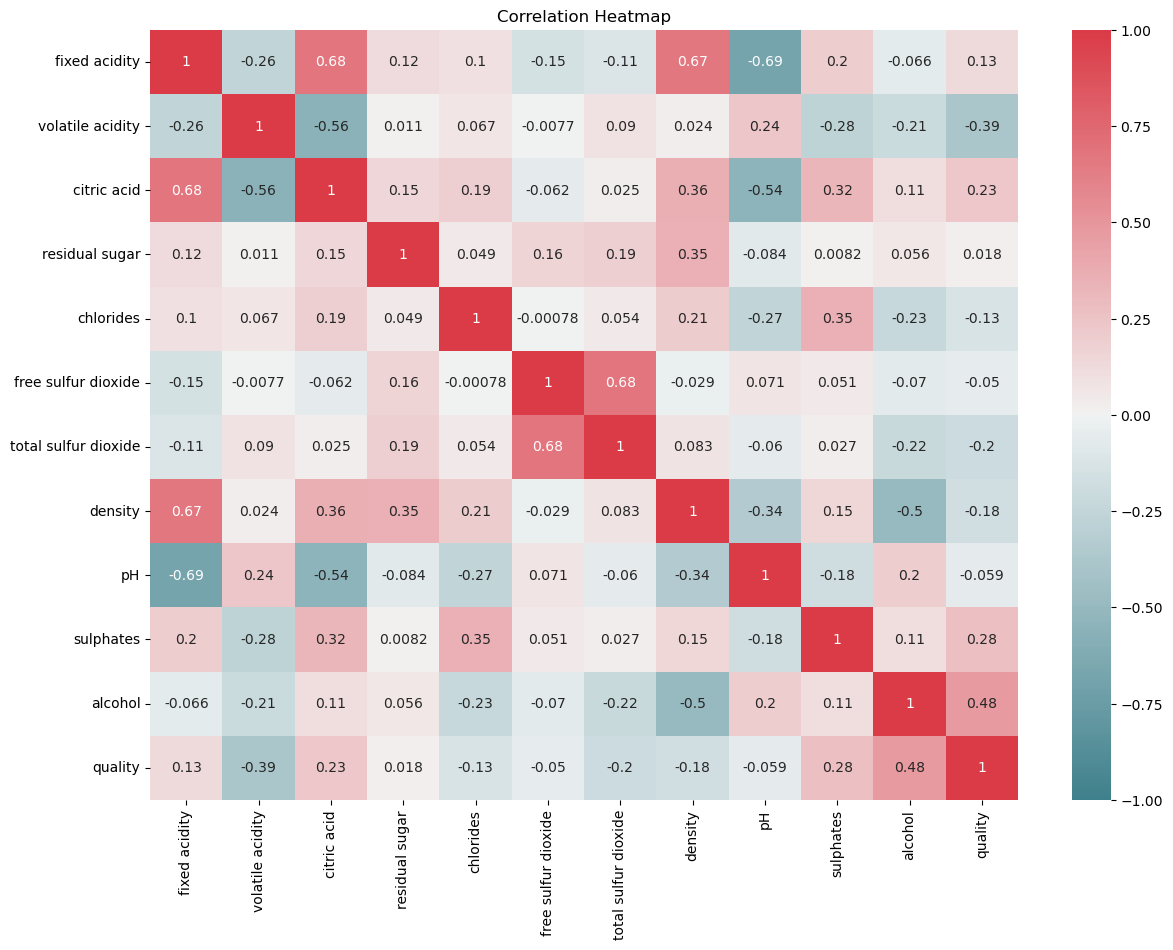

In [16]:
correlation = wine.corr()
plt.figure(figsize=(14,10))
plt.title('Correlation Heatmap')
colormap = sns.diverging_palette(210, 10, as_cmap=True)
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap= colormap)
plt.show()


In [17]:
# feature correlations with 'quality' column
cr = wine.corr()['quality'].sort_values(ascending=False)

print(cr)

quality                 1.000000
alcohol                 0.478386
sulphates               0.277811
citric acid             0.228795
fixed acidity           0.125397
residual sugar          0.017676
free sulfur dioxide    -0.050069
pH                     -0.059038
chlorides              -0.128109
density                -0.175989
total sulfur dioxide   -0.199392
volatile acidity       -0.388874
Name: quality, dtype: float64


Observations: 
- 'alcohol' ,'sulphates' and 'citric acid' have strong positive correlations with quality of red wine. 
- 'volatile acidity', and 'total sulfur dioxide' have strong negative correlations with quality of red wine.
- Also we see that 'fixed acidity' is very strongly correlated with density and citric acid.

#### Histograms

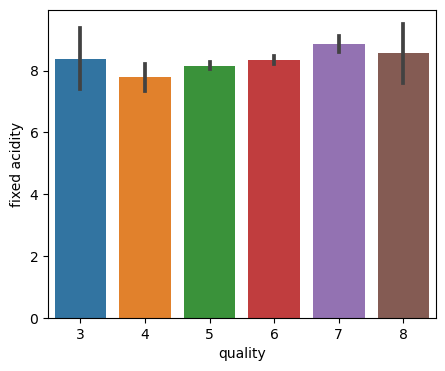

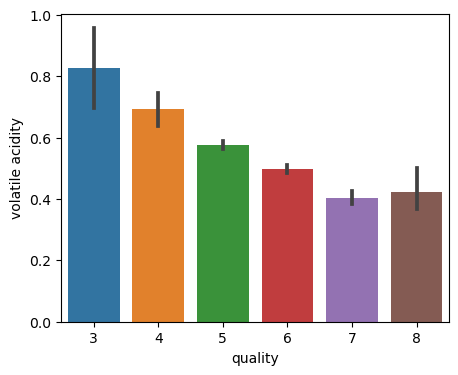

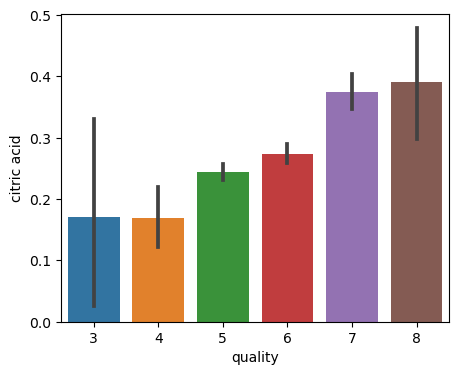

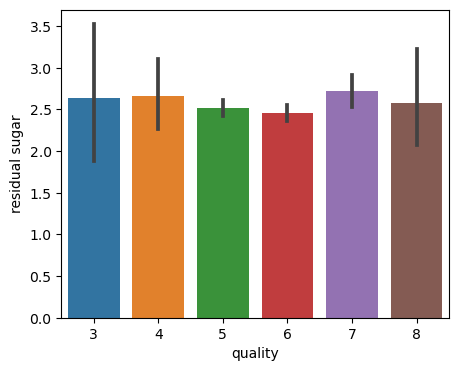

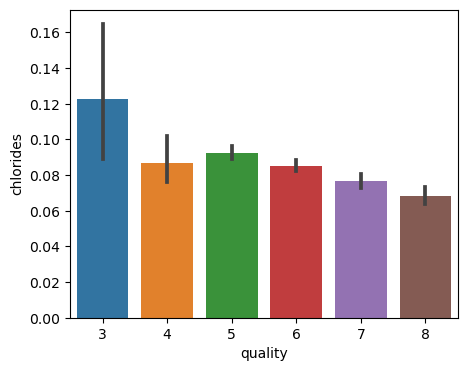

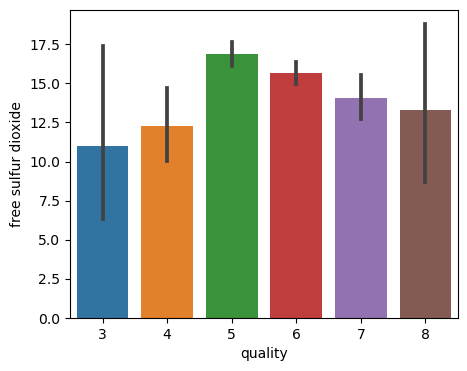

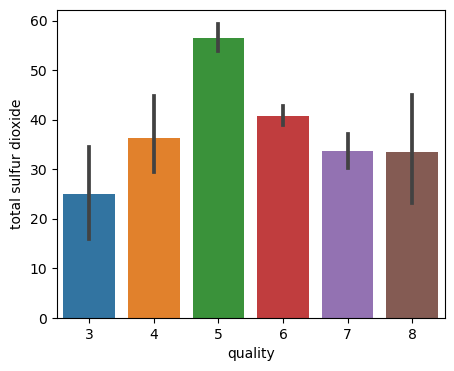

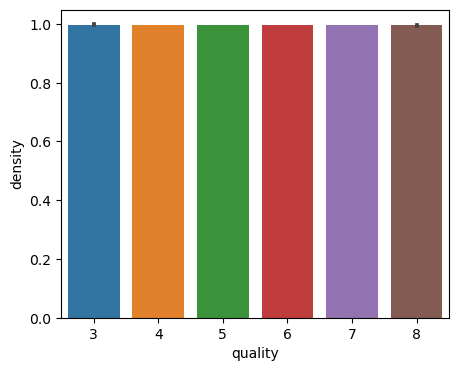

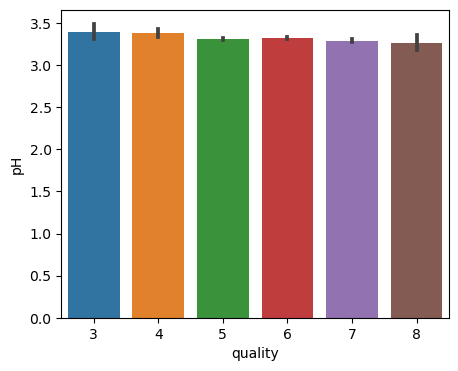

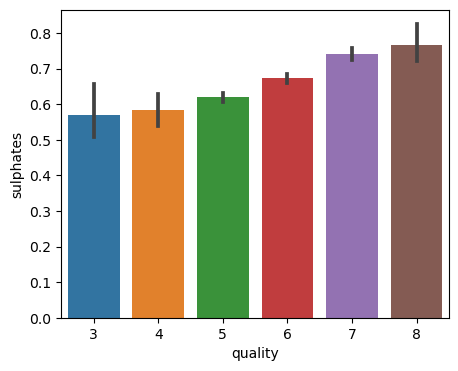

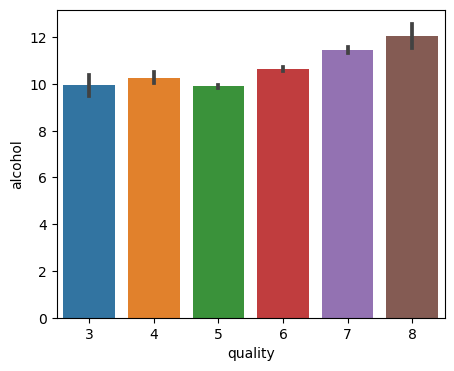

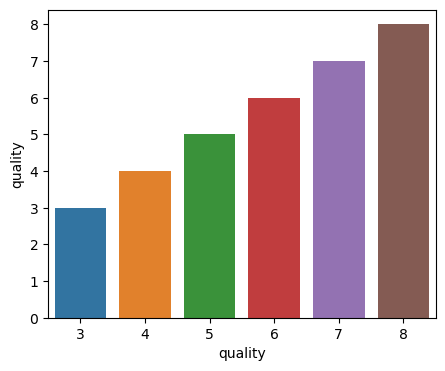

In [18]:
for f in wine.columns:
    plt.figure(figsize=(5,4))
    sns.barplot(x="quality", y=f, data=wine )
    plt.show()

Observations:
- higher values of alcohol, sulphates and citric acid seem to belong to high quality wines

- while higher values of volatile acidity and chlorides are present in low quality wines.

#### Feature Selection

From the above observations from correlation heatmap and histograms, 7 feature columns are selected. They are:
'alcohol', 'sulphates', 'citric acid', 'volatile acidity', 'fixed acidity', 'total sulfur dioxide', and 'chlorides'.
Other feature columns can be dropped from the dataset as they don't show much relation with the target column.

#### Create Training , Validation and Test Sets

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# Split dataset into features and target 

X = wine[['fixed acidity','volatile acidity','chlorides','total sulfur dioxide','citric acid','sulphates','alcohol']] # selected features
y = wine['quality'] #  target column

In [21]:
# Split dataset into train , validation and test set; ratio>> 60:20:20

X_train, X_test,y_train, y_test = train_test_split(X, y , test_size=0.4, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=1)

In [22]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(y), 2))

0.6
0.2
0.2


#### Standardizing Independent Variables

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val  = sc.fit_transform(X_val)
X_test = sc.fit_transform(X_test)

### Modeling


<li>Implement Multivariable Linear Regression using Lasso and Ridge regression algorithms</li>

In [25]:
# Modeling using Ridge regression and Lasso regression 

from sklearn.linear_model import Lasso , Ridge

lasso = Lasso(alpha=0.1)
ridge =  Ridge(alpha=0.1)

#### Fit models on full training set

In [26]:
lasso.fit(X_train,y_train)

Lasso(alpha=0.1)

In [27]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

### Model evaluation


<li>Use three metrics: R-squared, RMSE, and MAE, to evaluate model prediction performance</li>
<li>Compare these 3 metrics for the two models and analyze the performance</li>
<li>Calculate the feature importance scores for the top features that help predicting wine quality and visualize them</li>

#### Evaluate models on the validation set

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [29]:
for mdl in [  ridge, lasso]:
    vpred = mdl.predict(X_val)
    mae = round(mean_absolute_error(y_val, vpred), 3)
    rmse = round((np.sqrt(mean_squared_error(y_val,vpred))), 3)
    r2 = round(r2_score(y_val, vpred), 3)
    print( '{} -- MAE: {} / RMSE: {} / Rsquared: {}'.format( mdl, mae, rmse, r2))

Ridge(alpha=0.1) -- MAE: 0.494 / RMSE: 0.637 / Rsquared: 0.3
Lasso(alpha=0.1) -- MAE: 0.515 / RMSE: 0.65 / Rsquared: 0.27


 
On comparing the evaluation metrics scores of both the models, ridge regression performs well on the validation dataset. So, ridge regression model is selected as the best model to be tested on test data.

##### Evaluate best model on test set

In [30]:
tpred = ridge.predict(X_test)
mae = round(mean_absolute_error(y_test, tpred), 3)
rmse = round((np.sqrt(mean_squared_error(y_test, tpred))), 3)
r2 = round(r2_score(y_test, tpred), 3)
print( ridge ,' -- MAE: {} / RMSE: {} / Rsquared: {}'.format( mae, rmse, r2))

Ridge(alpha=0.1)  -- MAE: 0.506 / RMSE: 0.651 / Rsquared: 0.379


Observations: 
- compared to validation results MAE and RMSE scores declined a little, while R-squared score improved.

#### Feature Importance

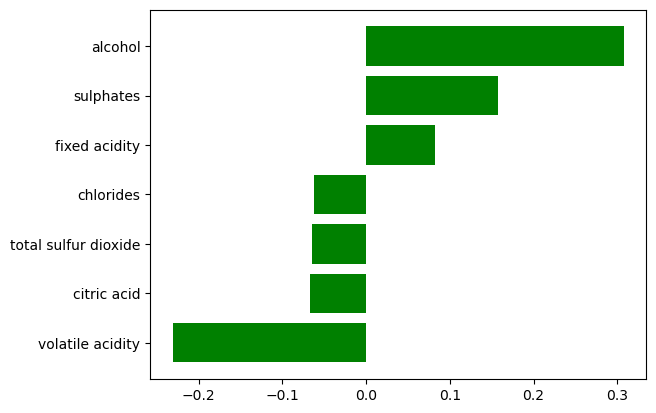

In [31]:
importance = ridge.coef_   #feature importance is calculated using coef_ attribute

# feature importance plot
indices = np.argsort(importance)
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.barh(range(len(indices)), importance[indices], color='g', align='center')
plt.show()

Observations: All the selected features have decently impacted the model. Alcohol and volatile acidity impact the most on performance of the model


### Conclusion



After EDA,  7 (fixed acidity, volatile acidity, chlorides, total sulfur dioxide, citric acid, sulphates, and alcohol) out of 11 features were chosen from the original dataset. 
I have computed the evaluation metrics for both the regression algorithms(Lasso and Ridge) and arrived at the conclusion that ridge regression works better in this senario. Moreover, we can always try improving the model performance by doing more good amount of feature engineering and Hyperparameter Tuning.